# Advisory mission for the Boston municipal authorities


During the last municipal campaign in Boston, criminality has been a major topic of debates. As citizens have expressed strong expectations from her on that front, the newly-elected mayor of Boston is looking for data-based insights on criminality in the Massachussetts capital.

By The Locomotive 

## Imports

In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## Building the dataset

In [3]:
query = """
    SELECT
        indicators.*,
        districts.NAME,
        COUNT(incident_reports.INCIDENT_NUMBER) AS NB_INCIDENTS
    FROM indicators
    JOIN 
        districts ON districts.CODE = indicators.CODE,
        incident_reports ON incident_reports.DISTRICT = indicators.CODE 
    GROUP BY incident_reports.DISTRICT
"""

In [4]:
conn = sqlite3.connect("db/boston_crimes.sqlite")

In [5]:
crimes_df = pd.read_sql_query(query, conn)

In [6]:
crimes_df.head()

,MEDIAN_AGE,TOTAL_POP,PERC_OF_30_34,PERC_MARRIED_COUPLE_FAMILY,PER_CAPITA_INCOME,PERC_OTHER_STATE_OR_ABROAD,PERC_LESS_THAN_HIGH_SCHOOL,PERC_COLLEGE_GRADUATES,CODE,NAME,NB_INCIDENTS
0,33.5,18306,32.5,35.8,80057,14.8,15.4,6.9,A1,Downtown,26260
1,35.7,19890,28.2,36.4,75339,3.4,7.9,8.2,A15,Charlestown,4765
2,30.6,47263,31.1,30.4,31473,3.5,27.2,11.5,A7,East Boston,9691
3,32.5,54161,27.8,17.8,20978,2.9,23.0,18.9,B2,Roxbury,38877
4,36.7,26659,20.9,29.8,28356,2.3,14.5,22.9,B3,Mattapan,28331


* How are the features correlated in the dataset :

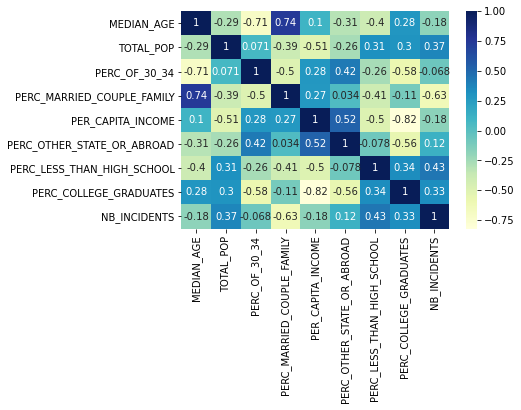

In [7]:
corr = crimes_df.corr()
sns.heatmap(corr,cmap= "YlGnBu",annot=True);